# Predictive Maintinance and Analysis of Back Blaze Hard Disk Drives.
### Introduction

Put write up here.

## Data Import and Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import glob


In [3]:
os.getcwd()
path = '/Users/Aron/CDS/CDS_492/HDD-Failure'
os.chdir(path)

In [4]:
#read in the data
#make list of all the files 
#files = [f for f in glob.glob("data/*/*.csv")]

df = pd.concat([pd.read_csv(f) for f in glob.glob("data/*/*.csv")],ignore_index = True)


In [5]:
# make lists of column names needed
IDCols = df.columns[0:5]
rawCols = df.columns[6::2]
allrawCols = IDCols.append(rawCols)
normCols = df.columns[5::2]
allNormCols = IDCols.append(normCols)

In [7]:
# check the order of columns
print(IDCols)
print(rawCols[0:5])
print(normCols[0:5])
print(allrawCols[0:7])
print(allNormCols[0:7])

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure'], dtype='object')
Index(['smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw',
       'smart_5_raw'],
      dtype='object')
Index(['smart_1_normalized', 'smart_2_normalized', 'smart_3_normalized',
       'smart_4_normalized', 'smart_5_normalized'],
      dtype='object')
Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_raw', 'smart_2_raw'],
      dtype='object')
Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_2_normalized'],
      dtype='object')


In [6]:
#turn the date column to an actual date.
df['date'] = pd.to_datetime(df['date'])

In [7]:
#select the drives that have failed
fail_drives = df[df['failure'] == 1]
fail_drives = fail_drives['serial_number']
fail = df[df['serial_number'].isin(fail_drives)].reset_index(drop = True)

In [8]:
print(len(fail))
print(len(fail_drives))
#get the raw data. Start with the normalized data given. 
#fail_raw = fail_names[allrawCols]
#sort it 
#fail_raw = fail_raw.sort_values(by = ['serial_number','date'])
#fail_raw = fail_raw.reset_index()

63374
735


In [9]:
fail_norm = fail[IDCols.append(normCols)].sort_values(['serial_number', 'date']).reset_index()

In [13]:

#fail_norm[fail_norm['smart_198_normalized'].isna()]
#df[df['smart_198_normalized'].isna()].sum

In [17]:
#visualize the missing data
fail_norm.isna().sum()
#Wow, there is a lot of NA values in this 

index                       0
date                        0
serial_number               0
model                       0
capacity_bytes              0
failure                     0
smart_1_normalized          0
smart_2_normalized      57066
smart_3_normalized          0
smart_4_normalized          0
smart_5_normalized          0
smart_7_normalized          0
smart_8_normalized      57066
smart_9_normalized          0
smart_10_normalized         0
smart_11_normalized     61219
smart_12_normalized         0
smart_13_normalized     63374
smart_15_normalized     63374
smart_22_normalized     63374
smart_183_normalized    11718
smart_184_normalized     8132
smart_187_normalized     8132
smart_188_normalized     8132
smart_189_normalized     8132
smart_190_normalized     8132
smart_191_normalized     7610
smart_192_normalized      143
smart_193_normalized      474
smart_194_normalized        0
smart_195_normalized    56261
smart_196_normalized    55242
smart_197_normalized        0
smart_198_

In [18]:
fail_norm['model'].value_counts()


ST4000DM000                48460
ST8000DM002                 3536
ST4000DX000                 2355
Hitachi HDS5C3030ALA630     1907
HGST HMS5C4040BLE640        1797
Hitachi HDS723030ALA640      961
WDC WD30EFRX                 779
HGST HMS5C4040ALE640         767
WDC WD60EFRX                 721
ST6000DX000                  698
ST500LM012 HN                331
Hitachi HDS5C4040ALE630      279
WDC WD5000LPVX               216
TOSHIBA MQ01ABF050           157
ST3160318AS                  143
TOSHIBA MD04ABA400V          109
WDC WD1600AAJS                62
ST320LT007                    35
WDC WD10EACS                  25
WDC WD5000LPCX                21
ST8000NM0055                  15
Name: model, dtype: int64

Now the drives that have failed are completly sorted, fiirst by serial number then by date.  might need to group_by in order for each serial number to be trated as a single series. not sure though. 

Now lets try start to interrogate the data

In [16]:
#Lets see how many NA's are across the whole data set.
print(df[allrawCols].isna().sum()/len(df))

date                    0.000000
serial_number           0.000000
model                   0.000000
capacity_bytes          0.000000
failure                 0.000000
smart_1_normalized      0.000032
smart_2_normalized      0.641019
smart_3_normalized      0.000032
smart_4_normalized      0.000032
smart_5_normalized      0.000032
smart_7_normalized      0.000032
smart_8_normalized      0.641019
smart_9_normalized      0.000032
smart_10_normalized     0.000032
smart_11_normalized     0.960527
smart_12_normalized     0.000032
smart_13_normalized     1.000000
smart_15_normalized     1.000000
smart_22_normalized     0.999394
smart_183_normalized    0.503583
smart_184_normalized    0.387593
smart_187_normalized    0.387593
smart_188_normalized    0.387593
smart_189_normalized    0.387593
smart_190_normalized    0.387593
smart_191_normalized    0.371246
smart_192_normalized    0.001263
smart_193_normalized    0.012156
smart_194_normalized    0.000032
smart_195_normalized    0.843953
smart_196_

In [10]:

#Make sure that the NA's arent associated with the failure lines.
df['failure'].sum()/len(df.serial_number.unique())
 

0.008550588071057132

In [20]:
#so what we have is a number of columns that seem to have little information.  
#Some are completly filled with NA'sand some are well over 80% NA.  
#reading literature about what each SMART diagnostic measures tells us that some of the columns are manufacture specific,
# some are for solid state hard drives, and thus not applicable to the type of drive in the data center.


In [21]:
#check the corrolation matrix
corrmat =df[normCols].corr()

<AxesSubplot:>

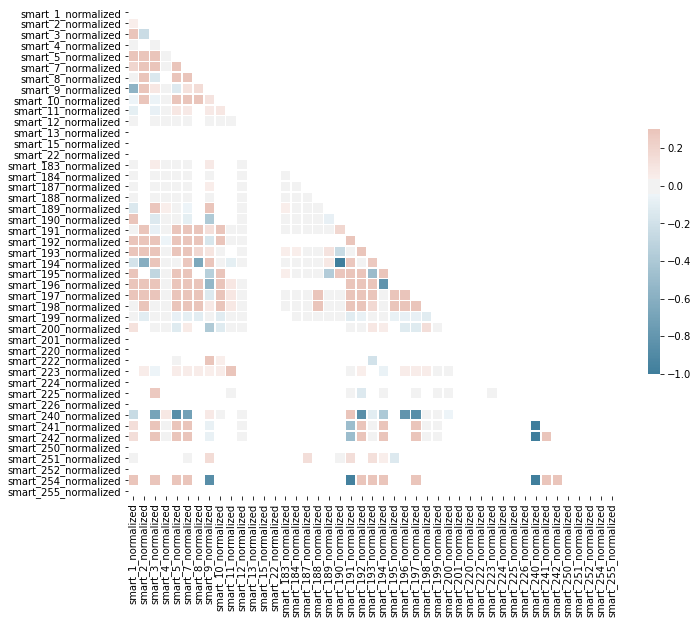

In [22]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# there are a lot of null values.  lets clear that up.  

In [59]:
# Remove lines that are less than a certain threshold.
df_80 = df[normCols].loc[:, df[normCols].isna().mean() < .80]
#df_20 = df[normCols].loc[:, df[normCols].isna().mean() <.20]
cols_80 = df_80.columns
#cols_20 = df_20.columns


<AxesSubplot:>

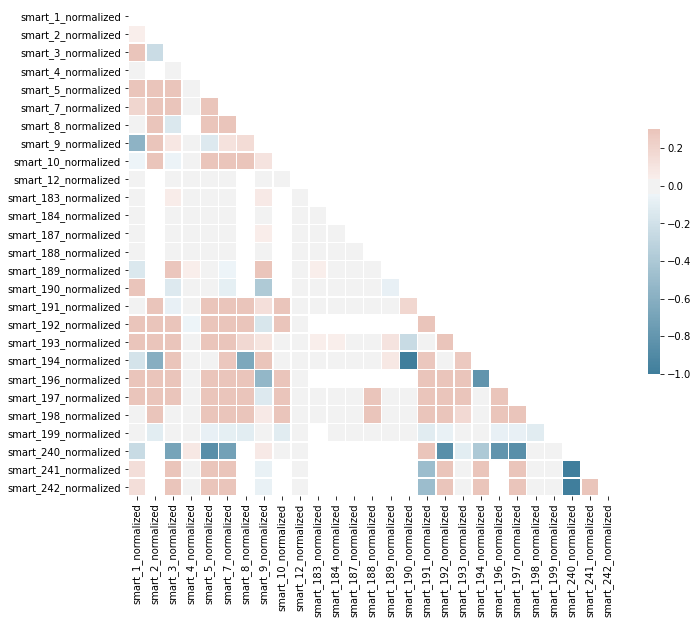

In [24]:
#check the corrolation plot again
corrmat =df[.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 


<AxesSubplot:>

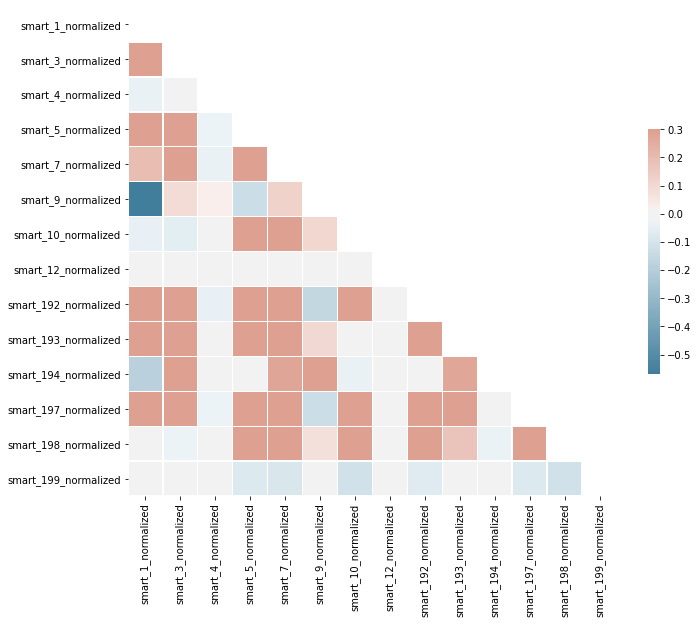

In [25]:
#check the corrolation plot again
corrmat =df_20.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Colinearity summary
The colinearity heatmaps look pretty good.  The highest value in the less than 20% of the columns are NA is just above .5, and is the assocaiton between smart 9 and smart 1.  This actually makes sense since smart 1 is the read error rate, and smart 9 is the time that the HDD has been running.there are quite a few rows that have basically zero corrolation.  The majority of corrolations in the heatmap are negative corrolations around 0.3 and below.   

## Preparing for training

The target feature that I am interested in predicitng is "days until failure". The data used to determine this will be all available data for the subset of drives that have experienced a failure. I will use the columns that have less than 80% missing data in the column.   

In [85]:
#Get the data from the failed drives.
#create the target variable in the failed drives
fail['until_fail'] = fail['date'].groupby(fail['serial_number']).transform('max')-fail['date']


#fail is the df containing all the feature and target and id information.  
feature_cols = cols_80
target_col = fail['until_fail'].dt.days


In [ ]:
serial_nums = set(fail['serial_number'])
train = random.sample(serial_nums, int(np.floor(.8*len(serial_nums))))

In [91]:
import random
#serial number train/test split
serial_nums = set(fail['serial_number'])
train = random.sample(serial_nums, int(np.floor(.8*len(serial_nums))))
train_data = fail[fail['serial_number'].isin(train)]
train_data = train_data[feature_cols]

test_data = fail[~fail['serial_number'].isin(train)]
test_data = test_data[feature_cols]

train_lbl = fail['until_fail'][fail['serial_number'].isin(train)].dt.days
test_lbl = fail['until_fail'][~fail['serial_number'].isin(train)].dt.days

# PCA
sicne there is high dimentionality, we will extract the latent features using PCA

In [126]:
from sklearn.decomposition import PCA

In [127]:
# PCA dosent work wioth missing data... more robust methods can be used later, for now, just fill with 0.  
#fill the feature column NA's with 0
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [137]:
pca = PCA(svd_solver='full')
principalcomponents = pca.fit_transform(train_data)
pcaCols = ['pca'+str(x+1) for x in range(len(feature_cols))]
pca_df = pd.DataFrame(data = principalcomponents,
                     columns =pcaCols)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.64970162e-01 1.06527335e-01 6.51275936e-02 2.72253516e-02
 1.25562545e-02 5.02452943e-03 4.43539416e-03 3.13150104e-03
 2.57086079e-03 2.01536550e-03 1.50661535e-03 1.26335160e-03
 8.76730487e-04 7.70428722e-04 5.70385296e-04 4.35705742e-04
 3.50360330e-04 3.31995505e-04 1.47664042e-04 1.05391415e-04
 5.64669881e-05 5.54633005e-07 2.30806122e-09 5.21774319e-33
 5.21774319e-33 5.21774319e-33 5.21774319e-33]
[2.96815538e+04 1.10763052e+04 8.66057846e+03 5.59952429e+03
 3.80272080e+03 2.40553722e+03 2.26011478e+03 1.89906865e+03
 1.72069408e+03 1.52349592e+03 1.31724203e+03 1.20621994e+03
 1.00484121e+03 9.41956000e+02 8.10491650e+02 7.08371412e+02
 6.35216613e+02 6.18344477e+02 4.12383956e+02 3.48391060e+02
 2.55012633e+02 2.52736077e+01 1.63037702e+00 2.45135232e-12
 2.45135232e-12 2.45135232e-12 2.45135232e-12]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [138]:
np.cumsum(pca.explained_variance_ratio_)

array([0.76497016, 0.8714975 , 0.93662509, 0.96385044, 0.9764067 ,
       0.98143123, 0.98586662, 0.98899812, 0.99156898, 0.99358435,
       0.99509096, 0.99635431, 0.99723105, 0.99800147, 0.99857186,
       0.99900756, 0.99935793, 0.99968992, 0.99983758, 0.99994298,
       0.99999944, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
# we can see that thre are a few components that did not add any information to explain the variance.  

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)
# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [142]:
pca = PCA(.99)
pca.fit(train_data)

PCA(n_components=0.99)

In [143]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [160]:
#import the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data, train_lbl)

LinearRegression()

In [161]:
model.coef_

array([-1.4204394 ,  0.95553608, -0.89695486, -2.94264655,  3.86068547,
       -7.00819305, -1.2730079 ,  5.98296466,  0.79377184,  2.7931988 ,
       -3.57819633])

In [164]:
model.predict(test_data)

array([43.13407786, 59.38959781, 46.7498067 , ..., 44.87049363,
       60.57490085, 61.60508801])

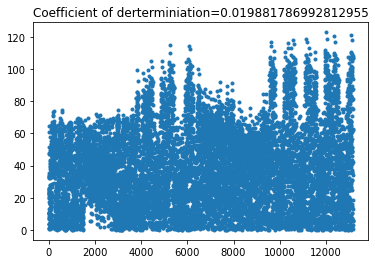

In [172]:
x = test_lbl
y = model.predict(test_data)
diff = abs(x-y)
x1 = range(len(x))
R2 = model.score(test_data,test_lbl)
plt.title('Coefficient of derterminiation='+str(R2))
plt.scatter(x1,diff, marker = ".")

In [ ]:
#This is a horrible model right now.  but its a model!

In [29]:
df_20 = df[IDCols.append(cols_20)]
df_20['days_running'] = df_20['date']-df_20['date'].groupby(df_20['serial_number']).transform('min')
#add days running. to main df.  Make sure to move this to the right place.
d['days'] = d['date'] - d['date'].groupby(d['SN']).transform('min')

#fail_grouped = fail[IDCols.append(cols_20)]

#fail_grouped['days_until_fail'] =  fail_grouped['date'].groupby(fail_grouped['serial_number']).transform('max')-fail_grouped['date'] 


<ipython-input-29-83e088e6ddb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['days_running'] = df_20['date']-df_20['date'].groupby(df_20['serial_number']).transform('min')


In [30]:
df_20

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,days_running
0,2017-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3.000593e+12,0,100.0,127.0,100.0,100.0,100.0,95.0,100.0,100.0,100.0,100.0,214.0,100.0,100.0,200.0,92 days
1,2017-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3.000593e+12,0,100.0,126.0,100.0,100.0,100.0,95.0,100.0,100.0,100.0,100.0,253.0,100.0,100.0,200.0,92 days
2,2017-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4.000787e+12,0,100.0,130.0,100.0,100.0,100.0,96.0,100.0,100.0,100.0,100.0,206.0,100.0,100.0,200.0,92 days
3,2017-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3.000593e+12,0,100.0,137.0,100.0,100.0,100.0,95.0,100.0,100.0,100.0,100.0,230.0,100.0,100.0,200.0,92 days
4,2017-01-01,Z305B2QN,ST4000DM000,4.000787e+12,0,113.0,91.0,100.0,100.0,85.0,90.0,100.0,100.0,100.0,84.0,24.0,100.0,100.0,200.0,92 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221546,2016-10-02,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4.000787e+12,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,253.0,100.0,100.0,200.0,1 days
13221547,2016-10-02,Z3016V0V,ST4000DM000,4.000787e+12,0,118.0,91.0,100.0,100.0,81.0,74.0,100.0,100.0,100.0,88.0,20.0,100.0,100.0,200.0,1 days
13221548,2016-10-02,MJ1323YNG1LZJC,Hitachi HDS5C3030ALA630,3.000593e+12,0,100.0,124.0,100.0,100.0,100.0,94.0,100.0,100.0,99.0,99.0,214.0,100.0,100.0,200.0,1 days
13221549,2016-10-02,S300YQXW,ST4000DM000,4.000787e+12,0,116.0,96.0,100.0,100.0,85.0,88.0,100.0,100.0,100.0,76.0,22.0,100.0,100.0,200.0,1 days


In [24]:
df_20['days_running'] = df_20['date']-df_20.groupby(df_20['serial_number']).transform('min')


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,until
0,2017-01-01,Z300KMM3,ST4000DM000,4.000787e+12,0,119.0,91.0,100.0,100.0,81.0,67.0,100.0,100.0,100.0,35.0,27.0,100.0,100.0,200.0,77 days
1,2017-01-01,Z302DK2R,ST4000DM000,4.000787e+12,0,116.0,92.0,100.0,100.0,87.0,83.0,100.0,100.0,100.0,83.0,24.0,100.0,100.0,200.0,24 days
2,2017-01-01,Z3051NNA,ST4000DM000,4.000787e+12,0,119.0,92.0,100.0,100.0,85.0,90.0,100.0,100.0,100.0,83.0,29.0,100.0,100.0,200.0,19 days
3,2017-01-01,S300Z60P,ST4000DM000,4.000787e+12,0,119.0,99.0,100.0,100.0,87.0,85.0,100.0,100.0,100.0,81.0,26.0,100.0,100.0,200.0,64 days
4,2017-01-01,Z1Z06H5C,ST4000DX000,4.000787e+12,0,117.0,90.0,100.0,100.0,92.0,87.0,100.0,100.0,100.0,100.0,27.0,100.0,100.0,200.0,39 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63369,2016-10-02,Z302F0C2,ST4000DM000,4.000787e+12,0,114.0,99.0,100.0,100.0,87.0,86.0,100.0,100.0,100.0,84.0,23.0,100.0,100.0,200.0,38 days
63370,2016-10-02,Z1Z058NN,ST4000DX000,4.000787e+12,0,120.0,91.0,100.0,100.0,96.0,66.0,100.0,100.0,100.0,100.0,36.0,100.0,100.0,200.0,31 days
63371,2016-10-02,S300ZS0Z,ST4000DM000,4.000787e+12,0,111.0,92.0,100.0,100.0,86.0,88.0,100.0,100.0,100.0,82.0,30.0,100.0,100.0,200.0,82 days
63372,2016-10-02,W300R8AC,ST4000DM000,4.000787e+12,0,119.0,91.0,100.0,100.0,85.0,77.0,100.0,100.0,100.0,92.0,20.0,100.0,100.0,200.0,144 days


198.0

## Grouping.  
set the days until failed column this is what we are ultimatly trying to predict.

In [12]:
#get the drives that failed and group them by serial number. we have some of this from above.
# fail_drives is the df of all lines of serial numbers that failed.
# data from the drives taht failed
fail_20 =fail[cols_20]


In [17]:
from sklearn.decomposition import NMF


In [22]:
# replace nan with zeros. hope this is ok.  it probably isnt, but I want to get. result. 
# ill do a better data impute later.
# Ill just make note and fix this later during refinement.
# if all the zeros are gone, I can do PCA too.
fail_20_filled = fail_20.fillna(0)
df_20_filled = df_20.fillna(0)

In [29]:
model = NMF(n_components=10, init='random', random_state=0, max_iter=5000)
W = model.fit_transform(df_20_filled)
H = model.components_

KeyboardInterrupt: 

In [28]:
W_fail = model.fit_transform(fail_20_filled)
H_fail = model.components_

In [1]:
H_fail

NameError: name 'H_fail' is not defined

In [31]:

#PCA
from sklearn.decomposition import PCA

In [32]:
pca = PCA(svd_solver='full')
pca.fit(df_20_filled)
#PCA(svd_solver='full')
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.14280439e-01 1.73440896e-01 7.01582825e-02 1.83707105e-02
 9.03461881e-03 5.52458230e-03 3.48961356e-03 3.00980418e-03
 1.98127017e-03 4.29837881e-04 2.37862472e-04 2.43389054e-05
 1.67091247e-05 1.03429039e-06]
[347440.75119362 171207.24221199 108889.4618328   55719.77500499
  39075.20756343  30555.97182186  24284.82871025  22553.58045024
  18298.61532471   8523.12229807   6340.29319124   2028.13517916
   1680.44083498    418.08792196]


In [77]:
pca = PCA(svd_solver='full')
pca.fit(df_20_filled)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.14280439e-01 1.73440896e-01 7.01582825e-02 1.83707105e-02
 9.03461881e-03 5.52458230e-03 3.48961356e-03 3.00980418e-03
 1.98127017e-03 4.29837881e-04 2.37862472e-04 2.43389054e-05
 1.67091247e-05 1.03429039e-06]
[347440.75119362 171207.24221199 108889.4618328   55719.77500499
  39075.20756343  30555.97182186  24284.82871025  22553.58045024
  18298.61532471   8523.12229807   6340.29319124   2028.13517916
   1680.44083498    418.08792196]


17.544

47.41111111111112